In [2]:
using Pkg
Pkg.activate(homedir()*"/julia/tmp/")

"/Users/vincentcp/julia/tmp/Project.toml"

In [3]:
using BasisFunctions
using FrameFun
using DomainSets
using Plots;gr()
using StaticArrays

┌ Info: Recompiling stale cache file /Users/vincentcp/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187


### One-dimensional approximations

In [4]:
f1 = x->cos(3*x)
F1 = Fun(f1, Fourier(61), -0.5..0.5)

DictFun{Float64,Complex{Float64}}(A 1-dimensional Expansion with 61 degrees of freedom.
Basis: An extension frame of Fourier series
)

You can evaluate the fun like an ordinary function:

In [5]:
F1(0.5)

0.07073720166220032 + 5.399403146810755e-12im

In [6]:
f1(0.5)

0.0707372016677029

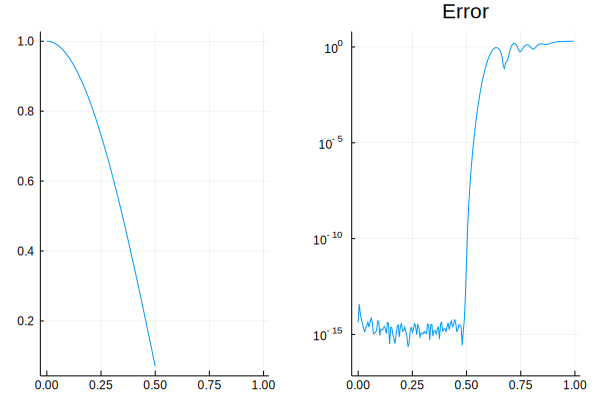

In [7]:
plot(F1,layout=2)
plot!(F1,f1,subplot=2)

In [8]:
B2 = ChebyshevT(130)
D = support(B2)/2
f2 = x->cos(80*x)
F2 = Fun(f2, B2, D)

DictFun{Float64,Float64}(A 1-dimensional Expansion with 130 degrees of freedom.
Basis: An extension frame of Chebyshev series (first kind)
)

In [9]:
F2(0.1)

-0.14550003380861287

In [10]:
f2(0.1)

-0.14550003380861354

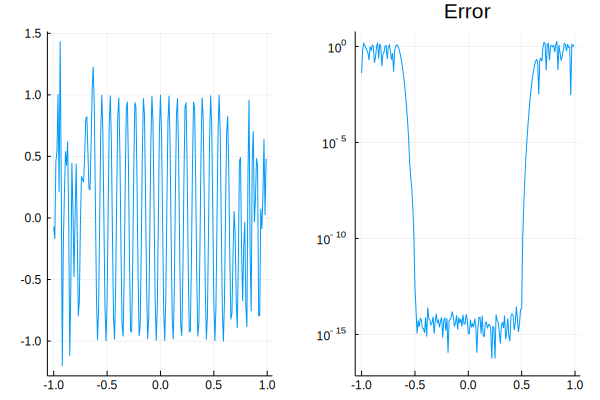

In [11]:
plot(F2, layout=2, plot_ext=true)
plot!(F2,f2, subplot=2)

In [12]:
f3 = x->cos(10*x.^2)
B = Fourier(41,-1,1)
D = DomainSets.UnionDomain(Interval(-1.0,-0.5),Interval(-0.2,0.5))
F3 = Fun(f3,B,D)

DictFun{Float64,Complex{Float64}}(A 1-dimensional Expansion with 41 degrees of freedom.
Basis: An extension frame of Mapping 0.0..1.0 (Unit) to -1.0..1.0
)

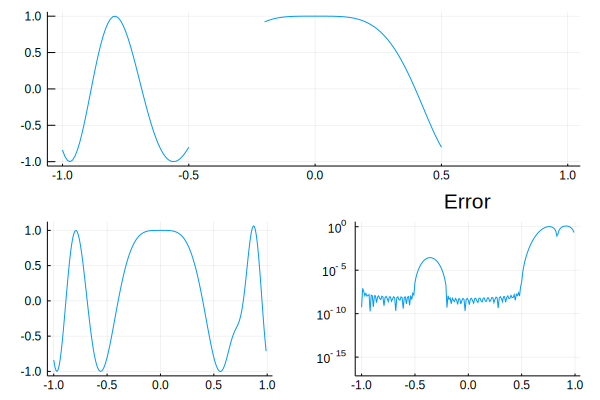

In [13]:
l = @layout [Plots.grid(1,1); Plots.grid(1,2)]
plot(F3, layout=l)
plot!(F3, subplot=2, plot_ext=true)
plot!(F3,f3, subplot=3)

### High precision

In [14]:
B = instantiate(Fourier,61,BigFloat)
D = Interval(0.,0.5)
fh = x->x
Fh = Fun(fh,B,D)

DictFun{BigFloat,Complex{BigFloat}}(A 1-dimensional Expansion with 61 degrees of freedom.
Basis: An extension frame of Fourier series
)

In [15]:
pt = 3//10
abs(Fh(pt)-fh(pt))

2.266638297003154286944068228631510047231782606249503427006910138850464521368453e-19

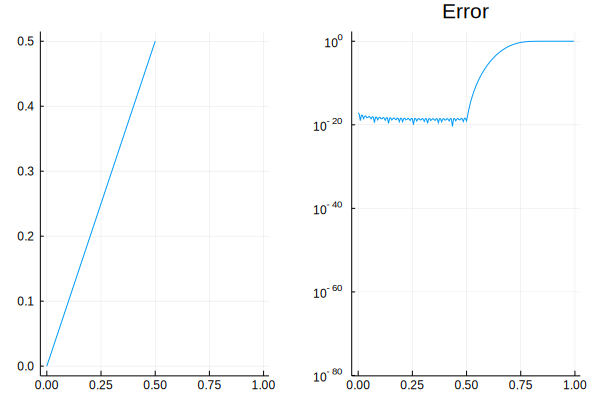

In [16]:
plot(Fh, layout=2)
plot!(Fh,fh, subplot=2)

### 2D approximations

##### Tensor product domains are fast

In [17]:
D = Interval(0.,.5)^2

0.0..0.5 x 0.0..0.5

In [19]:
B = Fourier(100)⊗Fourier(100)
f = (x,y)->exp(y*2*x)
F = Fun(f,B,D)

UndefVarError: UndefVarError: warning not defined

In [ ]:
plot(F)

In [ ]:
plot(F,f)

##### Simple domains and simple functions

In [ ]:
C = disk() \ disk(0.3,SVector(0.2, 0.5))

In [ ]:
plot(C)

In [ ]:
B = Fourier(41,-1.3,1.3) ⊗ Fourier(41,-1.3,1.3)
fC(x,y) = exp(y+x)
F = Fun(fC,B,C)

In [ ]:
F(0,0.4)

In [ ]:
fC(0, 0.4)

In [ ]:
plot(F)

In [ ]:
heatmap(F,fC)

##### Fractal domains

Like, for example, the Mandelbrot and a Julia set (Douady rabbit)

In [ ]:
plot(mandelbrot(),layout=2)
plot!(juliaset(),subplot=2)

In [ ]:
D=FrameFun.mandelbrot()
B = Fourier(31,-1.0,0.35) ⊗ Fourier(31,-0.65,0.65)
fm(x,y) = cos(10*x*y)
F = Fun(fm, B, D)

In [ ]:
heatmap(F)

In [ ]:
contourf(F,fm)